In [1]:
# ! pip install -U numpy
# ! pip install -U scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
%matplotlib widget

In [3]:
def plot(*args, y=None, stem=False):
    ax = plt.figure()
    if y is None:
        for y in args:
            x = np.arange(y.size)
            if stem:
                plt.stem(x, y)
            else:
                plt.plot(x, y)
    else:
        if stem:
            plt.stem(args[0], y)
        else:
            plt.plot(args[0], y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

In [4]:
def plot_scalogram(wavelet_coeficients: np.ndarray) -> None:
    xlist = ylist = np.arange(0, wavelet_coeficients.shape[0])
    X, Y = np.meshgrid(xlist, ylist)
    Z = wavelet_coeficients
    fig, ax = plt.subplots(1, 1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp, label='Значения вейвлет-коэффициентов')
    ax.set_ylabel('Ряды')
    ax.set_xlabel('Отсчёты')
    plt.show()

## Фильтрация сигналов с примененением непрерывного вейвлет преобразования


### Реализация алгоритма фильтрации с помощью НВП


In [5]:
def mexican_hat(t: np.ndarray):
    return np.exp((-1) * np.power(t, 2) / 2) * (1 - t ** 2)

In [6]:
def y(x: np.ndarray) -> np.ndarray:
    result = np.zeros(x.size)
    for idx in range(result.size):
        result[idx] = np.sin(0.5 * 2 * np.pi * x[idx]) + \
            np.sin(0.8 * 2 * np.pi * x[idx] + (np.pi / 6))
    return result

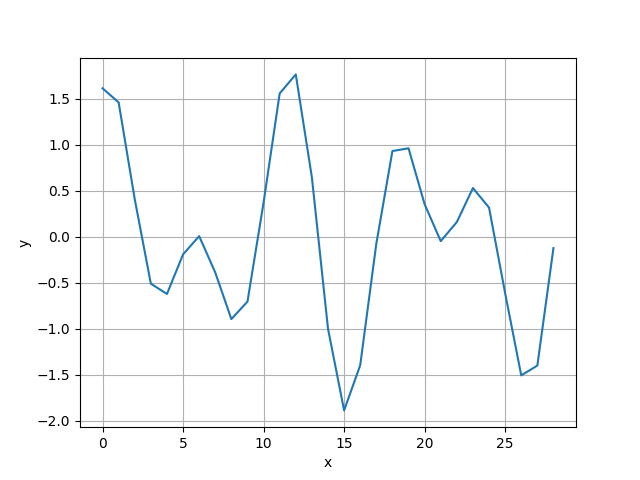

In [7]:
N = 30
x = np.arange(start=1, stop=30)
signal = y(x * (2 * np.pi / N))
plot(signal)

In [8]:
def wavelet_transform(signal: np.ndarray,
                      psi_func: Callable):
    dt = 2 * np.pi / signal.size

    def wavelet_transform_array(a: float):

        def wavelet_transform_element(b: float):
            result_sum = np.zeros(signal.size)
            for idx in range(result_sum.size):
                result_sum[idx] = signal[idx] * psi_func(((idx + 1) * dt - b) / a)
            return np.sum(result_sum)

        result_array = np.zeros(signal.size)
        for idx in range(result_array.size):
            result_array[idx] = wavelet_transform_element((idx + 1) * dt)
        return result_array

    result = []
    for k in range(signal.size):
        result.append(wavelet_transform_array((k + 1) * dt))
    return np.array(result)

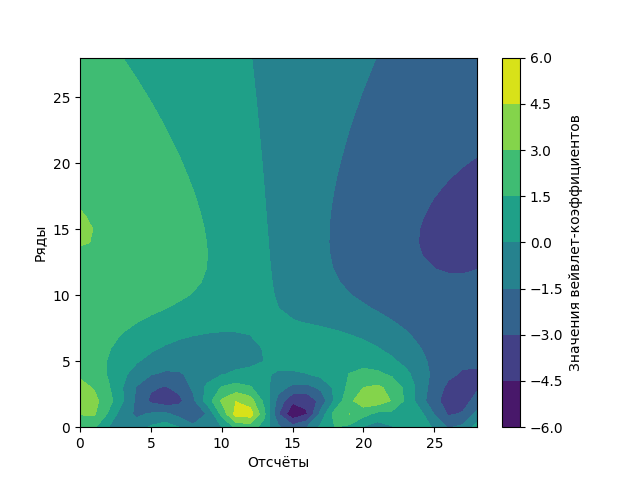

In [9]:
plot_scalogram(wavelet_transform(signal, mexican_hat))

In [10]:
def inverse_wavelet_transform(
    array: np.ndarray,
    psi_func: np.ndarray
) -> np.ndarray:
    dt = 2 * np.pi / signal.size
    """ 
    Так как на вход передается массив, где
    элементы массива являются срезам по рядям, то
    нужно транспонировать матрицу, чтобы получить
    срезы по отсчётам
    """
    array = array.T

    def inverse_wavelet_element_transform(t: float) -> np.ndarray:
        result_element = np.zeros(shape=(array.shape[0], array.shape[0]))
        for y in range(1, result_element.shape[0] + 1):
            for x in range(1, result_element.shape[1] + 1):
                result_element[y - 1, x - 1] = array[y - 1, x - 1] * \
                    psi_func((t - y * dt) / (x * dt)) * \
                    (1 / (((x * dt) ** 2) * np.sqrt(x * dt)))
        return ((dt ** 2) / np.pi) * np.sum(result_element)

    result = []
    for t in range(array.shape[0]):
        result.append(inverse_wavelet_element_transform((t + 1) * dt))
    return np.array(result)

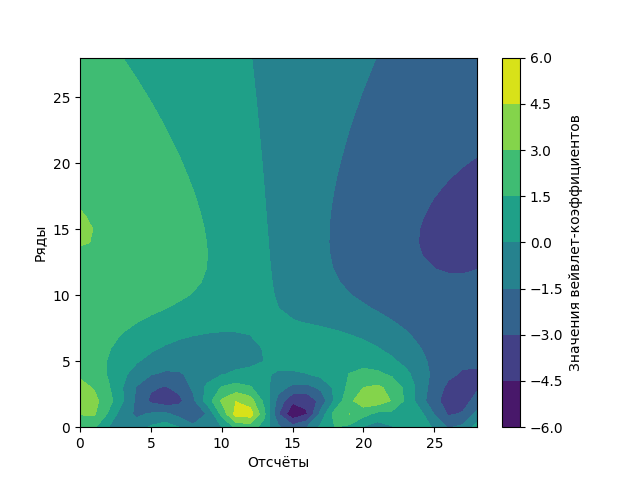

In [11]:
wt = wavelet_transform(signal, mexican_hat)
plot_scalogram(wt)

### Фильтруем первые 10 столбцов


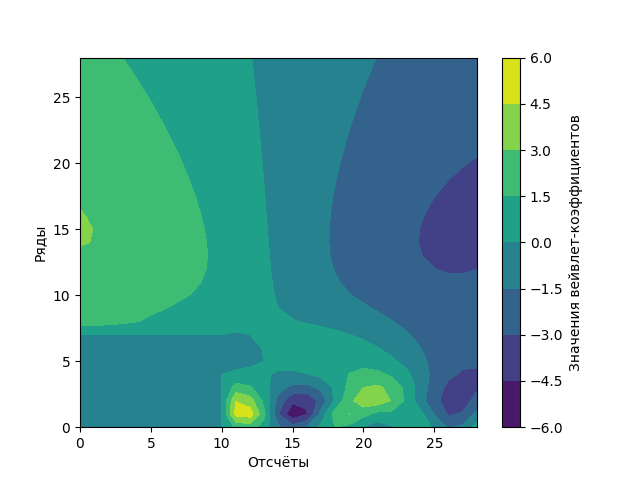

In [12]:
wt = wavelet_transform(signal, mexican_hat)
wt[0:8, 0:11] = 0
plot_scalogram(wt)

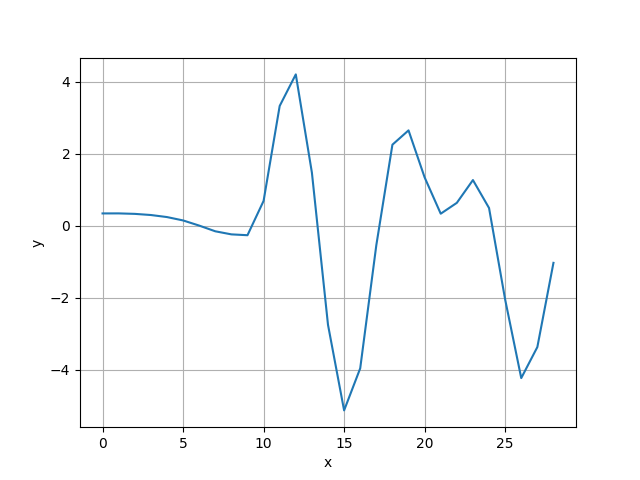

In [13]:
plot(inverse_wavelet_transform(wt, mexican_hat))

### Фильтруем первые 20 столбцов с высокочасотной составляющей


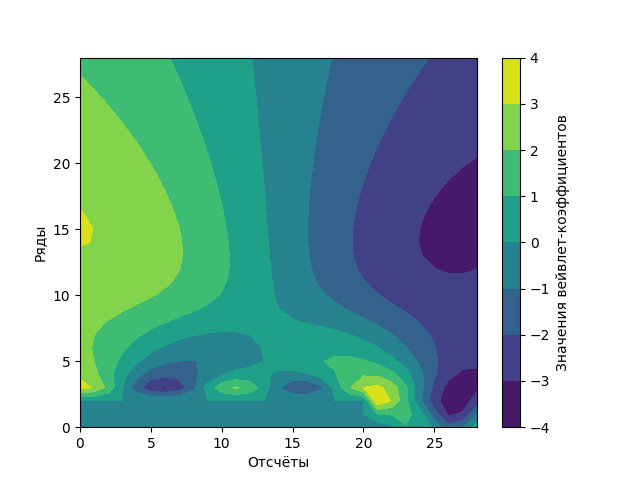

In [14]:
wt = wavelet_transform(signal, mexican_hat)
wt[0:3, 0:21] = 0
plot_scalogram(wt)

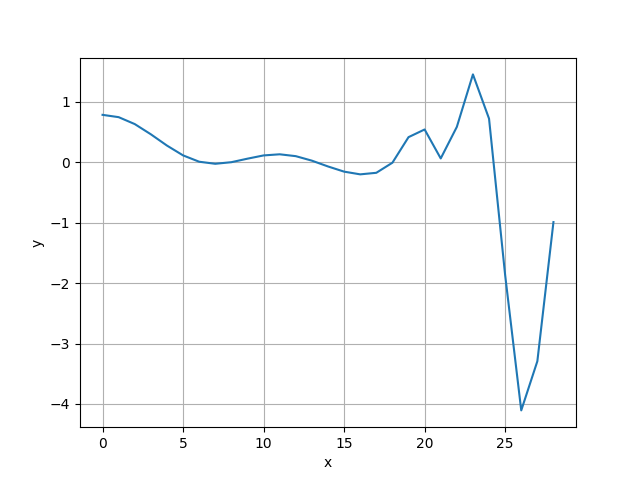

In [15]:
plot(inverse_wavelet_transform(wt, mexican_hat))